In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [59]:
from sklearn.datasets import load_boston ##to import Boston Housing Dataset 
boston_housing = load_boston()

In [60]:
boston_housing.keys() ##to see the information of the dataset from the dictionary

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [61]:
boston_housing.feature_names ##to see column or variable names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [62]:
print(boston_housing.DESCR) ##to see the description of the variables

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [63]:
boston = pd.DataFrame(boston_housing.data, columns=boston_housing.feature_names) ##creating a dataframe using feature_names (columns)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [64]:
boston.shape 


(506, 13)

there are total of 506 observations with 13 variables.

In [65]:
boston.isnull().sum() ##checking for the missing values

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

<AxesSubplot:>

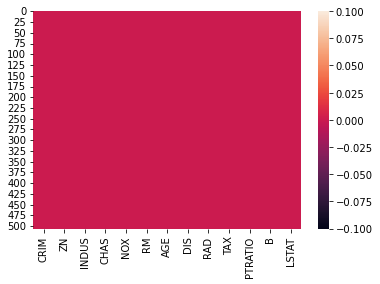

In [79]:
sns.heatmap(boston.isnull()) 

there is no missing value in the dataset.

In [66]:
boston.describe() 
##to check the summary statistics (mean, standard deviation, minimum and maximum value, interquartile ranges)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


From the summary statistics, I can see that there is a huge difference between standard deviations among variables and mean(s) among variables. So, I need to scale the data. 

In [9]:
X=boston
Y= boston_housing.target

/Users/supreetbhatia/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

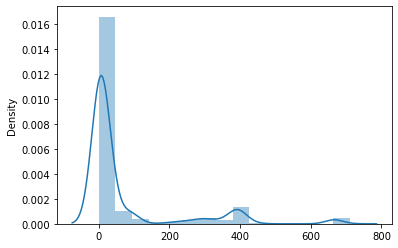

In [55]:
sns.distplot(X, bins = 15) ## to check the normality of data

From the graph, it is clear that the data is skewed to the right.

/Users/supreetbhatia/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

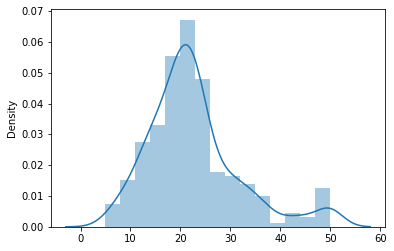

In [56]:
sns.distplot(Y, bins = 15) ## to check the normality of target variable. 

From the graph, it is clear that this variable is normally distributed. So, there is no need to scale it. 

<AxesSubplot:>

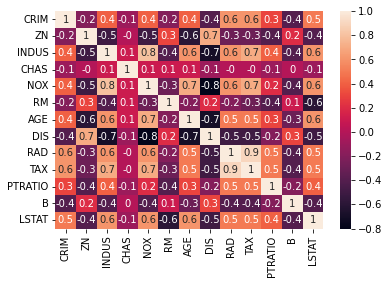

In [84]:
correlation_matrix = boston.corr().round(1)
sns.heatmap(data=correlation_matrix, annot=True)

In [57]:
from sklearn.model_selection import train_test_split  

##splitting the data into training and testing with 80% data into training and 20% into testing set

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=15)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [67]:
Y_train.shape

(404,)

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [69]:
X_train = scaler.fit_transform(X_train)

In [70]:
X_test = scaler.transform(X_test)

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
Model = LinearRegression() ##to run a simple linear regression model

In [73]:
Model.fit(X_train, Y_train)

LinearRegression()

In [74]:
Model.intercept_ ##to see the model intercept

22.760891089108956

In [75]:
Model.coef_ ##to see coefficients of predictors 

array([-0.95037087,  1.2744009 ,  0.38852504,  0.92457288, -2.39853318,
        2.41042119,  0.1257358 , -3.45110794,  2.9668004 , -2.10575388,
       -2.00113243,  0.99151786, -4.07231   ])

In [76]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [77]:
# model evaluation for testing set
Y_predict = Model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, Y_predict)))
r2 = r2_score(Y_test, Y_predict)
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

RMSE is 4.879779243478217
R2 score is 0.6920749038652122


In [78]:
from sklearn.model_selection import cross_val_score

In [31]:
scores = cross_val_score(Model, X_train, Y_train, scoring='r2', cv=5, n_jobs=-1)
##K-cross validation with K as 5
print(scores)

[0.65549051 0.7177681  0.77540057 0.67056506 0.7466708 ]


In [85]:
from numpy import mean
mean(scores) #accuracy of model

0.7053575974895752

In [32]:
from sklearn.linear_model import SGDRegressor

In [33]:
Model1=SGDRegressor(penalty = 'elasticnet',alpha=0.01) 
##to run linear regression model with stochastic gradient descent and penalty = elastic net 

In [34]:
Model1.fit(X_train, Y_train)

SGDRegressor(alpha=0.01, penalty='elasticnet')

In [35]:
Model1.intercept_  ##to see the model intercept

array([22.77371911])

In [36]:
Model1.coef_ ##to see coefficients of predictors 

array([-0.7784606 ,  1.00291756, -0.07863265,  0.95510935, -1.90100074,
        2.57595124,  0.02559764, -3.09046784,  1.85278462, -0.87559424,
       -1.83970454,  0.97660044, -3.91138682])

In [38]:
# model evaluation for testing set
Y_predict = Model1.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, Y_predict)))
r2 = r2_score(Y_test, Y_predict)
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

RMSE is 4.853305277134484
R2 score is 0.695406974828797


In [39]:
scores1 = cross_val_score(Model1, X_train, Y_train, scoring='r2', cv=5, n_jobs=-1)
##K-cross validation with K as 5
print(scores1)

[0.66168049 0.71264182 0.76955901 0.6704718  0.74342946]


In [40]:
from numpy import mean
mean(scores1)

0.7115565152805052

In [41]:
Model2=SGDRegressor(penalty = 'l2',alpha=0.4) 
##to run linear regression model with stochastic gradient descent and penalty = Ridge Regression(l2) 
## I am taking alpha 0.4

In [42]:
Model2.fit(X_train, Y_train)

SGDRegressor(alpha=0.4)

In [43]:
Model2.intercept_  ##to see the model intercept

array([22.76868062])

In [44]:
Model2.coef_ ##to see coefficients of predictors 

array([-0.55647791,  0.56693873, -0.3977079 ,  0.86507225, -0.794114  ,
        2.49749201, -0.14032961, -1.25104602,  0.45423877, -0.39245155,
       -1.43566734,  0.83206711, -2.71495016])

In [45]:
##to test the data and accuracy of the model
Y_predict = Model2.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, Y_predict)))
r2 = r2_score(Y_test, Y_predict)
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

RMSE is 4.6590910931971
R2 score is 0.7192969455649884


In [46]:
from sklearn.metrics import classification_report

In [47]:
scores2 = cross_val_score(Model2, X_train, Y_train, scoring='r2',
                         cv=5, n_jobs=-1)
##K-cross validation with K as 5
print(scores2)

[0.61747599 0.65452197 0.70489479 0.69275413 0.70971264]


In [73]:
from numpy import mean
mean(scores2)

0.6728543295986951

From the above three models, Model, Model1, Mode2, by looking at their corresponding values of R square, the model3 which is with SGD ridge regression penalty is better. It has 71.9% R2 which means that 71.9% of the data fits the model. 